In [2]:
from tensorflow.keras

SyntaxError: invalid syntax (<ipython-input-2-1c6e1a4fd50f>, line 1)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)         

## Finding Convolution output

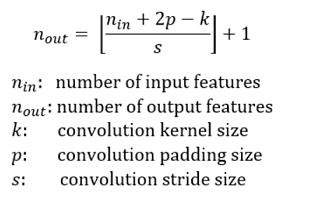

In [ ]:
'''
Condition:

padding='valid' p = 0 (np padding) ; padding='same'  p = 1
default stride is '1'

In [60]:
import numpy as np

def findConvOutput(filters,input_size,padding,kernel_size,stride):
    if padding =='valid':
        p =0
    elif padding == 'same':
        p =1
        
    conv_output = ((input_size + (2*p) - kernel_size ) / stride) + 1,((input_size + (2*p) - kernel_size ) / stride) + 1,filters
    
    return conv_output

In [62]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 31, 31, 16)        208       
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [63]:
findConvOutput(16,32,'valid',2,1,)

(31.0, 31.0, 16)

In [68]:
# padding = 'same'
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        208       
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [69]:
findConvOutput(16,32,'same',2,1)

(33.0, 33.0, 16)

In [27]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 16)        448       
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [64]:
findConvOutput(16,32,'valid',3,1)

(30.0, 30.0, 16)

In [30]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='valid', activation='relu', strides = 2,input_shape=(32, 32, 3)))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 15, 15, 16)        448       
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [65]:
findConvOutput(16,32,'valid',3,2)

(15.5, 15.5, 16)

In [121]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))   # default stride =2
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 16)        0         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


## Finding Output at Max Pooling Layer

In [122]:
def findMaxPoolingOutput(filter,input_size,pool_size,stride):
    output = ((input_size - pool_size) / stride ) + 1,((input_size - pool_size) / stride) + 1,filter
    return output

In [124]:
findMaxPoolingOutput(16,32,2,2)

(16.0, 16.0, 16)

In [125]:
'''
input_shape =32
pooling_size = 2
strides = 3
'''

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2,strides=3))   # default stride =3
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 11, 11, 16)        0         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [126]:
findMaxPoolingOutput(16,32,2,3)

(11.0, 11.0, 16)

In [131]:
'''
input_shape =32
pooling_size = 3
strides = 3
'''

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=3,strides=3))   # default stride =3
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 10, 10, 16)        0         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [132]:
findMaxPoolingOutput(16,32,3,3)

(10.666666666666666, 10.666666666666666, 16)

In [129]:
'''
input_shape =28
pooling_size = 3
strides = 3
'''


model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=3,strides=3))   # default stride =3
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 16)        208       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 9, 9, 16)          0         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [130]:
findMaxPoolingOutput(16,28,3,3)

(9.333333333333334, 9.333333333333334, 16)

# Finidng Total parametrs at Conv Layer

In [ ]:
'''

Parameters = (filter_height * filter_width * input_image_channels + 1) * number_of_filters

Note: 1 is added in the above formula indicates bias
      filter_height = kernel_height
      filter_width = kernel_width  

In [10]:

def finalTotalParams(totalFeatures,kernel_height,kernel_width,channel):
    return (kernel_height*kernel_width*channel + 1) * totalFeatures

In [5]:
model = Sequential()
model.add(Conv2D(filters=1, kernel_size=3, activation='relu', input_shape=(5, 5, 1)))
model.add(MaxPooling2D(pool_size=3,strides=3))   # default stride =3
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 3, 3, 1)           10        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [13]:
'''

In the above the example

'''

number_of_features = 1
kernel = 3*3
kernel_height = 3
kernel_width = 3
channels = 1

paramters = (3 * 3 * 1 + 1) * 1

paramters = 10

In [14]:
finalTotalParams(number_of_features,kernel_height,kernel_width,channels)

10

In [143]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=3,strides=3))   # default stride =3
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 16)        208       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 9, 9, 16)          0         
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


In [16]:
'''

In the above the example
'''

number_of_features = 16
kernel = 2*2
kernel_height = 2
kernel_width = 2
channels = 3

paramters = (2 * 2 * 3 + 1) * 16

paramters = 208

In [17]:
finalTotalParams(number_of_features,kernel_height,kernel_width,channels)

208